### IMPORT AND LOAD

In [491]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

### EXPLORATORY DATA ANALYSIS

In [235]:
# df.head()
# df.info()
# df.describe()
# df.describe(include=['object', 'bool'])
# df.dtypes
# categorical_features = df.select_dtypes(include=[object])     # apresenta colunas de um determinado tipo
# categorical_features.columns
print(df.Churn.value_counts(normalize=True))     # mostra distribuição do target normalizada

No    0.73
Yes   0.27
Name: Churn, dtype: float64


In [495]:
# df.columns
# Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
#       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

c_id = 20                        # id da coluna em análise
c = df.columns[c_id]
# c = 'gender'
print(df[c].value_counts())
print(df[c].value_counts(normalize=True))     # mostra distribuição do target normalizada
print(df[c].describe())
print(type(df[c][0]))

df['TotalCharges'][df['TotalCharges'] == ' '] = '0'     # verifica as linhas cujo 'TotalCharges' == ' ' e atribui '0'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])  # transforma a coluna de string para numérico

No     5174
Yes    1869
Name: Churn, dtype: int64
No    0.73
Yes   0.27
Name: Churn, dtype: float64
count     7043
unique       2
top         No
freq      5174
Name: Churn, dtype: object
<class 'str'>


In [449]:
# verifica correçaão entre 2 features
# st = df.groupby(['StreamingTV','TechSupport' ]).agg(np.count_nonzero).customerID
# st

### HISTOGRAM

(array([9.86623134e-04, 2.77835050e-04, 2.06215349e-04, 1.28421534e-04,
        9.50813284e-05, 1.09899198e-04, 9.13768610e-05, 6.29759448e-05,
        4.19839632e-05, 4.81580754e-05, 4.56884305e-05, 3.95143183e-05,
        4.32187856e-05, 2.84009163e-05, 3.21053836e-05, 2.46964489e-05,
        2.09919816e-05, 1.85223367e-05, 4.93928978e-06, 1.23482245e-06]),
 array([  18.85  ,  452.1475,  885.445 , 1318.7425, 1752.04  , 2185.3375,
        2618.635 , 3051.9325, 3485.23  , 3918.5275, 4351.825 , 4785.1225,
        5218.42  , 5651.7175, 6085.015 , 6518.3125, 6951.61  , 7384.9075,
        7818.205 , 8251.5025, 8684.8   ]),
 <a list of 20 Patch objects>)

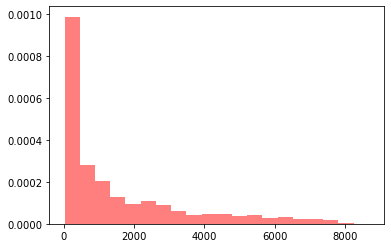

In [493]:
# plt.hist(df[c], normed=True, bins=20, alpha=0.5)
plt.hist(df[df.Churn == 'Yes'][c], normed=True, bins=20, color='r', alpha=0.5)

(array([4.74245692e-04, 2.74563295e-04, 2.29099893e-04, 1.97008079e-04,
        1.33270171e-04, 9.53840020e-05, 8.51324504e-05, 8.51324504e-05,
        8.73610485e-05, 8.60238896e-05, 7.48808988e-05, 7.71094969e-05,
        7.08694220e-05, 7.84466558e-05, 6.19550293e-05, 5.74978330e-05,
        4.81377206e-05, 3.69947297e-05, 3.43204119e-05, 1.87202247e-05]),
 array([   0.    ,  433.6225,  867.245 , 1300.8675, 1734.49  , 2168.1125,
        2601.735 , 3035.3575, 3468.98  , 3902.6025, 4336.225 , 4769.8475,
        5203.47  , 5637.0925, 6070.715 , 6504.3375, 6937.96  , 7371.5825,
        7805.205 , 8238.8275, 8672.45  ]),
 <a list of 20 Patch objects>)

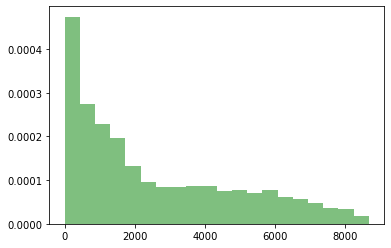

In [494]:
plt.hist(df[df.Churn == 'No'][c], normed=True, bins=20, color='g', alpha=0.5)

### BAR PLOT

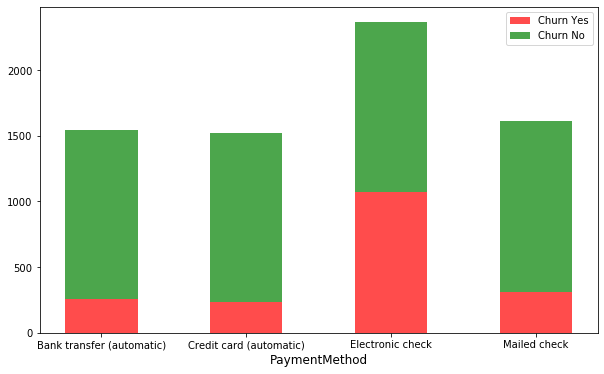

In [481]:
st = df.groupby(['Churn', c]).agg(np.count_nonzero)
yes_values = st.loc['Yes'].customerID.values
no_values = st.loc['No'].customerID.values
xvals = list(st.loc['Yes'].customerID.index)
xvals_str = [str(x) for x in xvals]
plt.figure(figsize=(10,6))
plt.xlabel(c,  fontsize=12)
plt.bar(xvals_str, yes_values, width=0.5, label='Churn Yes', color='r', alpha=0.7)
plt.bar(xvals_str, no_values, width=0.5, bottom=yes_values, label='Churn No', color='g', alpha=0.7)
plt.legend()

In [482]:
print(c)
for x in xvals:
    print(x)
    tot = st.customerID.loc[:,x].sum()
    print('total', tot)
    print(st.customerID.loc[:,x])
    print(st.customerID.loc[:,x] / tot)
    print('------------------------------')

PaymentMethod
Bank transfer (automatic)
total 1544
Churn
No     1286
Yes     258
Name: customerID, dtype: int64
Churn
No    0.83
Yes   0.17
Name: customerID, dtype: float64
------------------------------
Credit card (automatic)
total 1522
Churn
No     1290
Yes     232
Name: customerID, dtype: int64
Churn
No    0.85
Yes   0.15
Name: customerID, dtype: float64
------------------------------
Electronic check
total 2365
Churn
No     1294
Yes    1071
Name: customerID, dtype: int64
Churn
No    0.55
Yes   0.45
Name: customerID, dtype: float64
------------------------------
Mailed check
total 1612
Churn
No     1304
Yes     308
Name: customerID, dtype: int64
Churn
No    0.81
Yes   0.19
Name: customerID, dtype: float64
------------------------------


In [184]:
st.customerID

Churn  Contract      
No     Month-to-month    2220
       One year          1307
       Two year          1647
Yes    Month-to-month    1655
       One year           166
       Two year            48
Name: customerID, dtype: int64

### CHECKING MISSING VALUES

In [12]:
# print(pd.isnull(df).sum())     # Count the Null Columns
# df.isnull().sum()             # outra forma de fazer
# print(df[df["gender"].isnull()])    # Single Column Is Null
# print(df[df.isnull().any(axis=1)].head())    # All Null Columns

### CHECKING MISMATCHED VALUES

In [373]:
# df['TotalCharges'].str.findall(r'\D')   # verifica se há algum caracter na string que não é numérico
# type(df.TotalCharges[0])             # verifica o tipo de um determinado campo olhando a primera linha. Neste exemplo campo se chama 'TotalCharges'
# print(df.tenure.str.isnumeric())     # check se é numérico se a coluna for string. não este o caso aqui. ainda tenho dúvidas com esta função
# df.select_dtypes(include=["float", 'int64'])   # verifica quais colunas são numéricas
# df.select_dtypes(include=np.number)   # verifica quais colunas são numéricas. equivalente a anterior
# df.tenure                        # neste exemplo campo = 'tenure'. nesta função olhe o tipo do dado no final no campo dtype: int64 ou float ou str

### TRANSFORM

In [488]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

df['TotalCharges'][df['TotalCharges'] == ' '] = '0'     # verifica as linhas cujo 'TotalCharges' == ' ' e atribui '0'
# df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)     # outra forma de mudar espações por NaN
# df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())     # uma alternativa é colocar a mediana ao invés de zero
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])  # transforma a coluna de string para numérico

df['Churn'][df['Churn'] == 'No'] = 0     # atriui 0 onde era 'No'
df['Churn'][df['Churn'] == 'Yes'] = 1

col = 'Dependents'
df[col][df[col] == 'No'] = 0     # atriui 0 onde era 'No'
# df['Churn']=df['Churn'].replace('No',0)    # outra forma de fazer
df[col][df[col] == 'Yes'] = 1

col = 'Partner'
df[col][df[col] == 'No'] = 0     # atriui 0 onde era 'No'
df[col][df[col] == 'Yes'] = 1 

col = 'PaperlessBilling'
df[col][df[col] == 'No'] = 0     # atriui 0 onde era 'No'
df[col][df[col] == 'Yes'] = 1  

le = preprocessing.LabelEncoder()
col = 'TechSupport'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_TechSupport = {'No': 0, 'Yes': 2, 'No internet service': 1}

col = 'StreamingTV'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_TechSupport = {'No': 0, 'Yes': 2, 'No internet service': 1}

col = 'StreamingMovies'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_TechSupport = {'No': 0, 'Yes': 2, 'No internet service': 1}

col = 'OnlineSecurity'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_TechSupport = {'No': 0, 'Yes': 2, 'No internet service': 1}

col = 'DeviceProtection'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_TechSupport = {'No': 0, 'Yes': 2, 'No internet service': 1}

col = 'Contract'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_Contract = {'Month-to-month': 0, 'Two year': 2, 'One year': 1}

col = 'PaymentMethod'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_PaymentMethod = {'Electronic check': 2, 'Mailed check': 3, 'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1}

col = 'gender'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_TechSupport = {'Male': 1, 'Female': 0}

col = 'InternetService'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_PaymentMethod = {'Fiber optic': 1, 'DSL': 0, 'No': 2}

col = 'OnlineBackup'
le.fit(df[col])
df.at[:,col] = le.transform(df[col])
dict_TechSupport = {'No': 0, 'Yes': 2, 'No internet service': 1}

col = 'PhoneService'
df[col][df[col] == 'No'] = 0     # atriui 0 onde era 'No'
df[col][df[col] == 'Yes'] = 1

### FEATURE SELECTION

In [468]:
# df.columns
# Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
#       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
#       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

features = ['Contract', 'MonthlyCharges', 'tenure', 'TotalCharges', 'OnlineSecurity', 'TechSupport', 'InternetService',  'PaymentMethod', 'SeniorCitizen', 'Dependents', 'Partner', 'OnlineBackup', 'DeviceProtection', 'PaperlessBilling']
y = df['Churn']
y = y.astype('int')

### ONE HOT ENCODING

In [469]:
OHE = False
if OHE:
    col = 'Contract'
    df_ohe = df[features]
    ohe = OneHotEncoder(sparse=False) # categorical_features = boolean...
    # for col in features_ohe:
    le.fit(df[col])
    col2 = col + '_e'
    df.at[:,col2] = le.transform(df[col])
    colunas = list(df.groupby([col, col2]).max().index.levels[0])         

    X_ohe = ohe.fit_transform(df[col2].values.reshape(-1, 1)) # It returns an numpy array                
    new = pd.DataFrame(X_ohe, columns=colunas, index=df.index)
    df_ohe = pd.merge(new, df_ohe, how='inner', left_index=True, right_index=True)
    # df = df_ohe.copy()
    df = df_ohe.drop(col, axis=1)
else:
    df = df[features]

# ALTERNATIVA BEM MAIS SIMPLES
# final_df=pd.get_dummies(columns=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',# 'StreamingMovies','Contract','PaperlessBilling','PaymentMethod'],data=df)

### MODELING

In [470]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler

X = df

In [471]:
norm = False
# clf = RandomForestClassifier(n_estimators=100, max_features=5, n_jobs = -1, random_state = 0)  # n_estimators=600, 
# clf = RandomForestClassifier(criterion='entropy',n_estimators=1000,max_depth=100,oob_score=True,random_state=42)
clf = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.1, max_depth = 4, random_state = 0)
# clf = KNeighborsClassifier(n_neighbors = 4)
# clf = LogisticRegression(C=0.1)

# norm = True
# clf = MLPClassifier(hidden_layer_sizes = [100, 100], solver='adam',  activation = 'tanh', alpha=0.00001, random_state = 0)   
   
# Fit
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
if norm:
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

clf.fit(X_train, y_train)

y_proba_lr = clf.predict_proba(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr[:,1])
roc_auc_lr = auc(fpr_lr, tpr_lr)

y_predicted = clf.predict(X_test)
clr = classification_report(y_test, y_predicted, target_names = ['0', '1'])

### RESULTS

In [472]:
print('score train:', clf.score(X_train, y_train))
print('score test:', clf.score(X_test, y_test))
print('AUC', roc_auc_lr)
print(confusion_matrix(y_test, y_predicted))
print(clr)

score train: 0.8504354411207876
score test: 0.7887563884156729
AUC 0.8311690688781879
[[1155  143]
 [ 229  234]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1298
           1       0.62      0.51      0.56       463

    accuracy                           0.79      1761
   macro avg       0.73      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [473]:
feature_importances1 = pd.DataFrame(clf.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)
pd.set_option('display.float_format', '{:.6f}'.format)
feature_importances1

,importance
Contract,0.377629
MonthlyCharges,0.156800
tenure,0.136125
TotalCharges,0.118731
OnlineSecurity,0.060363
TechSupport,0.046706
InternetService,0.030969
PaymentMethod,0.022699
OnlineBackup,0.018391
PaperlessBilling,0.013901


### Melhorias
- cross validation
- usar get_dummies